   Iterasi                    x  Selisih |x_new - x_old|
0        0  0.000000+10.000000j             0.000000e+00
1        1  0.000000+ 5.500000j             4.500000e+00
2        2  0.000000+ 3.659091j             1.840909e+00
3        3  0.000000+ 3.196005j             4.630858e-01
4        4  0.000000+ 3.162456j             3.354946e-02
5        5  0.000000+ 3.162278j             1.779576e-04
6        6  0.000000+ 3.162278j             5.007295e-09


C:\Users\Leonardo\anaconda3\Lib\site-packages\matplotlib\collections.py:194: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)
C:\Users\Leonardo\anaconda3\Lib\site-packages\matplotlib\cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
C:\Users\Leonardo\anaconda3\Lib\site-packages\matplotlib\cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


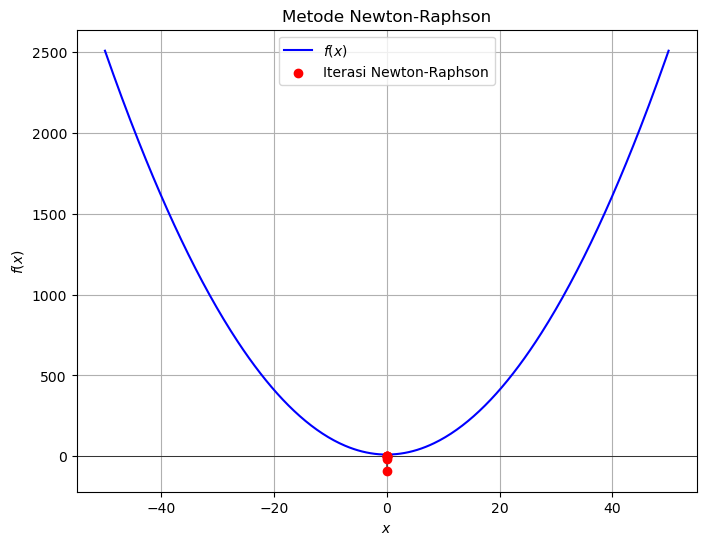

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Fungsi untuk Metode Newton-Raphson
def newton_raphson(f, df, x0, tol=1e-6, max_iter=1000):
    # Definisi fungsi:
    # f: fungsi yang akar-akarnya ingin dicari
    # df: turunan dari fungsi f
    # x0: nilai awal untuk iterasi
    # tol: toleransi kesalahan, jika selisih antara iterasi kurang dari ini, iterasi berhenti
    # max_iter: jumlah maksimum iterasi yang diperbolehkan

    iterasi = 0  # Inisialisasi counter iterasi
    nilai_x = [x0]  # List untuk menyimpan nilai x dari setiap iterasi, dimulai dari nilai awal
    selisih = []  # List untuk menyimpan selisih antara nilai x saat ini dengan nilai x baru pada setiap iterasi

    while iterasi < max_iter:  # Looping iterasi sampai jumlah maksimum tercapai
        fx = f(x0)  # Hitung nilai fungsi f(x) pada titik x0
        dfx = df(x0)  # Hitung nilai turunan df(x) pada titik x0
        
        if dfx == 0:  # Jika turunan nol, berhenti karena pembagian dengan nol tidak dapat dilakukan
            print("Turunan nol, tidak bisa dilanjutkan.")
            break
        
        # Hitung nilai x baru dengan rumus Newton-Raphson: x_new = x0 - f(x0) / df(x0)
        x_baru = x0 - fx / dfx
        
        error = abs(x_baru - x0)  # Hitung selisih antara nilai x baru dan x lama
        nilai_x.append(x_baru)  # Simpan nilai x baru ke dalam list x_values
        selisih.append(error)  # Simpan selisih ke dalam list selisih
        
        if error < tol:  # Jika selisih kurang dari toleransi yang ditentukan, iterasi dihentikan
            break
        
        x0 = x_baru # Perbarui nilai x0 untuk iterasi berikutnya
        iterasi += 1  # Tingkatkan counter iterasi
    
    return x_baru, nilai_x, selisih  # Kembalikan hasil akhir x_new, nilai-nilai x dari setiap iterasi, dan selisih


# Fungsi untuk plotting hasil iterasi
def plot_newton_raphson(f, x_nilai, x_range):
    # Definisi fungsi:
    # f: fungsi yang akar-akarnya ingin dicari (fungsi yang akan di-plot)
    # x_nilai: daftar nilai x dari hasil iterasi Newton-Raphson
    # x_range: rentang nilai x untuk membuat plot (misal, batas bawah dan atas dari sumbu x)
    
    x = np.linspace(x_range[0], x_range[1], 400)  # Membuat 400 titik x secara linier dari batas bawah ke atas
    y_f = f(x)  # Hitung nilai fungsi f(x) untuk setiap titik x
    
    plt.figure(figsize=(8, 6))  # Membuat kanvas plot dengan ukuran 8x6 inci
    plt.plot(x, y_f, label=r'$f(x)$', color='blue')  # Plot fungsi f(x) dengan garis biru
    plt.axhline(0, color='black', linewidth=0.5)  # Tambahkan garis horizontal di y=0 untuk menunjukkan sumbu x
    plt.scatter(x_nilai, [f(x) for x in x_nilai], color='red', label='Iterasi Newton-Raphson', zorder=5)
    # Plot titik-titik hasil iterasi Newton-Raphson sebagai scatter plot merah, dengan x_nilai sebagai x dan f(x_nilai) sebagai y
    
    # Plot garis vertikal dan horizontal yang menghubungkan nilai iterasi
    for i in range(1, len(x_nilai)):  # Iterasi dari titik kedua hingga terakhir
        plt.plot([x_nilai[i-1], x_nilai[i-1]], [f(x_nilai[i-1]), 0], 'k--', alpha=0.6)
        # Plot garis vertikal dari (x_nilai[i-1], f(x_nilai[i-1])) ke (x_nilai[i-1], 0) (ke sumbu x)
        plt.plot([x_nilai[i-1], x_nilai[i]], [0, 0], 'k--', alpha=0.6)
        # Plot garis horizontal dari (x_nilai[i-1], 0) ke (x_nilai[i], 0) (di sepanjang sumbu x)
    
    plt.xlabel(r'$x$')  # Label sumbu x
    plt.ylabel(r'$f(x)$')  # Label sumbu y
    plt.title('Metode Newton-Raphson')  # Judul plot
    plt.legend()  # Menampilkan legenda
    plt.grid(True)  # Mengaktifkan grid pada plot
    plt.show()  # Menampilkan plot


# Fungsi untuk menampilkan tabel hasil iterasi
def print_iteration_table(x_nilai, selisih):
    # Fungsi untuk menampilkan tabel hasil iterasi
    # x_nilai: daftar nilai x dari setiap iterasi
    # selisih: daftar selisih antara x_new dan x_old untuk setiap iterasi (dimulai dari iterasi ke-1)
    
    iterasi = np.arange(0, len(x_nilai))  # Membuat array nomor iterasi mulai dari 0 hingga jumlah elemen x_nilai
    
    # Membuat dictionary yang akan digunakan untuk membentuk DataFrame
    data = {
        'Iterasi': iterasi,  # Kolom untuk nomor iterasi
        'x': x_nilai,  # Kolom untuk nilai x pada setiap iterasi
        'Selisih |x_new - x_old|': [0] + selisih  # Kolom untuk selisih antara x baru dan x lama, dimulai dengan 0 untuk iterasi pertama
    }
    
    df = pd.DataFrame(data)  # Membuat DataFrame dari dictionary data
    print(df)  # Menampilkan DataFrame sebagai tabel hasil iterasi


# Persamaan f(x) dan turunan f'(x)
def f(x):
    return x**2 + 10  # Contoh persamaan f(x) , 
    
##### Untuk kasus akarnya berupa bilangan kompleks, maka iterasi tidak dapat menemukan solusinya (bukan bil. Reeal) #####
    
def df(x):
    return 2*x     # Turunan dari f(x)

# Titik awal
x0 = 10j

# Rentang untuk plotting
x_range = [-50, 50]

# Melakukan iterasi Newton-Raphson
x_root, x_values, diff_values = newton_raphson(f, df, x0)

# Menampilkan tabel iterasi
print_iteration_table(x_values, diff_values)

# Plotting hasil iterasi
plot_newton_raphson(f, x_values, x_range)


   Iterasi         x  Selisih |x_new - x_old|
0        0 -2.000000                 0.000000
1        1 -1.542342                 0.457658
2        2 -1.570804                 0.028462
3        3 -1.570796                 0.000008
4        4 -1.570796                 0.000000


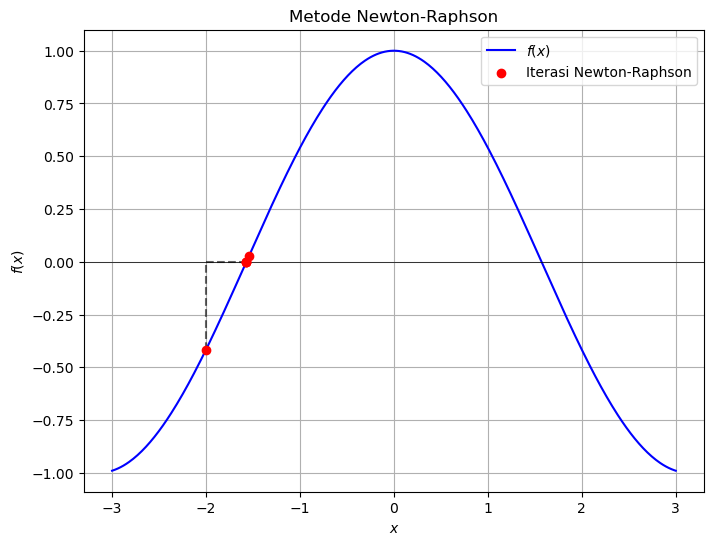

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Fungsi untuk Metode Newton-Raphson
def newton_raphson(f, df, x0, tol=1e-6, max_iter=100):
    # Definisi fungsi:
    # f: fungsi yang akar-akarnya ingin dicari
    # df: turunan dari fungsi f
    # x0: nilai awal untuk iterasi
    # tol: toleransi kesalahan, jika selisih antara iterasi kurang dari ini, iterasi berhenti
    # max_iter: jumlah maksimum iterasi yang diperbolehkan

    iterasi = 0  # Inisialisasi counter iterasi
    nilai_x = [x0]  # List untuk menyimpan nilai x dari setiap iterasi, dimulai dari nilai awal
    selisih = []  # List untuk menyimpan selisih antara nilai x saat ini dengan nilai x baru pada setiap iterasi

    while iterasi < max_iter:  # Looping iterasi sampai jumlah maksimum tercapai
        fx = f(x0)  # Hitung nilai fungsi f(x) pada titik x0
        dfx = df(x0)  # Hitung nilai turunan df(x) pada titik x0
        
        if dfx == 0:  # Jika turunan nol, berhenti karena pembagian dengan nol tidak dapat dilakukan
            print("Turunan nol, tidak bisa dilanjutkan.")
            break
        
        # Hitung nilai x baru dengan rumus Newton-Raphson: x_new = x0 - f(x0) / df(x0)
        x_baru = x0 - fx / dfx
        
        error = abs(x_baru - x0)  # Hitung selisih antara nilai x baru dan x lama
        nilai_x.append(x_baru)  # Simpan nilai x baru ke dalam list x_values
        selisih.append(error)  # Simpan selisih ke dalam list selisih
        
        if error < tol:  # Jika selisih kurang dari toleransi yang ditentukan, iterasi dihentikan
            break
        
        x0 = x_baru # Perbarui nilai x0 untuk iterasi berikutnya
        iterasi += 1  # Tingkatkan counter iterasi
    
    return x_baru, nilai_x, selisih  # Kembalikan hasil akhir x_new, nilai-nilai x dari setiap iterasi, dan selisih


# Fungsi untuk plotting hasil iterasi
def plot_newton_raphson(f, x_nilai, x_range):
    # Definisi fungsi:
    # f: fungsi yang akar-akarnya ingin dicari (fungsi yang akan di-plot)
    # x_nilai: daftar nilai x dari hasil iterasi Newton-Raphson
    # x_range: rentang nilai x untuk membuat plot (misal, batas bawah dan atas dari sumbu x)
    
    x = np.linspace(x_range[0], x_range[1], 400)  # Membuat 400 titik x secara linier dari batas bawah ke atas
    y_f = f(x)  # Hitung nilai fungsi f(x) untuk setiap titik x
    
    plt.figure(figsize=(8, 6))  # Membuat kanvas plot dengan ukuran 8x6 inci
    plt.plot(x, y_f, label=r'$f(x)$', color='blue')  # Plot fungsi f(x) dengan garis biru
    plt.axhline(0, color='black', linewidth=0.5)  # Tambahkan garis horizontal di y=0 untuk menunjukkan sumbu x
    plt.scatter(x_nilai, [f(x) for x in x_nilai], color='red', label='Iterasi Newton-Raphson', zorder=5)
    # Plot titik-titik hasil iterasi Newton-Raphson sebagai scatter plot merah, dengan x_nilai sebagai x dan f(x_nilai) sebagai y
    
    # Plot garis vertikal dan horizontal yang menghubungkan nilai iterasi
    for i in range(1, len(x_nilai)):  # Iterasi dari titik kedua hingga terakhir
        plt.plot([x_nilai[i-1], x_nilai[i-1]], [f(x_nilai[i-1]), 0], 'k--', alpha=0.6)
        # Plot garis vertikal dari (x_nilai[i-1], f(x_nilai[i-1])) ke (x_nilai[i-1], 0) (ke sumbu x)
        plt.plot([x_nilai[i-1], x_nilai[i]], [0, 0], 'k--', alpha=0.6)
        # Plot garis horizontal dari (x_nilai[i-1], 0) ke (x_nilai[i], 0) (di sepanjang sumbu x)
    
    plt.xlabel(r'$x$')  # Label sumbu x
    plt.ylabel(r'$f(x)$')  # Label sumbu y
    plt.title('Metode Newton-Raphson')  # Judul plot
    plt.legend()  # Menampilkan legenda
    plt.grid(True)  # Mengaktifkan grid pada plot
    plt.show()  # Menampilkan plot


# Fungsi untuk menampilkan tabel hasil iterasi
def print_iteration_table(x_nilai, selisih):
    # Fungsi untuk menampilkan tabel hasil iterasi
    # x_nilai: daftar nilai x dari setiap iterasi
    # selisih: daftar selisih antara x_new dan x_old untuk setiap iterasi (dimulai dari iterasi ke-1)
    
    iterasi = np.arange(0, len(x_nilai))  # Membuat array nomor iterasi mulai dari 0 hingga jumlah elemen x_nilai
    
    # Membuat dictionary yang akan digunakan untuk membentuk DataFrame
    data = {
        'Iterasi': iterasi,  # Kolom untuk nomor iterasi
        'x': x_nilai,  # Kolom untuk nilai x pada setiap iterasi
        'Selisih |x_new - x_old|': [0] + selisih  # Kolom untuk selisih antara x baru dan x lama, dimulai dengan 0 untuk iterasi pertama
    }
    
    df = pd.DataFrame(data)  # Membuat DataFrame dari dictionary data
    print(df)  # Menampilkan DataFrame sebagai tabel hasil iterasi


# Persamaan f(x) dan turunan f'(x)
def f(x):
    return np.cos(x)  # Contoh persamaan f(x)

def df(x):
    return -np.sin(x)      # Turunan dari f(x)

# Titik awal
x0 = -2.0

# Rentang untuk plotting
x_range = [-3, 3]

# Melakukan iterasi Newton-Raphson
x_root, x_values, diff_values = newton_raphson(f, df, x0)

# Menampilkan tabel iterasi
print_iteration_table(x_values, diff_values)

# Plotting hasil iterasi
plot_newton_raphson(f, x_values, x_range)


   Iterasi         x  Selisih |x_new - x_old|
0        0 -2.000000             0.000000e+00
1        1 -1.627566             3.724339e-01
2        2 -1.572653             5.491334e-02
3        3 -1.570799             1.854194e-03
4        4 -1.570796             2.186583e-06
5        5 -1.570796             3.043787e-12


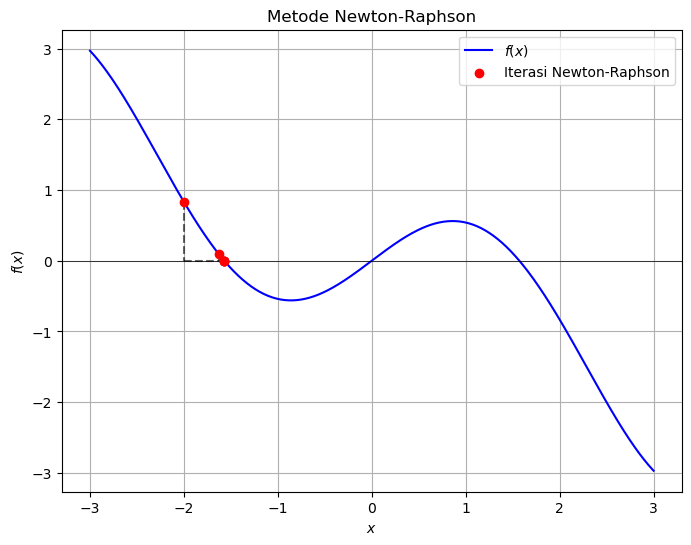

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Fungsi untuk Metode Newton-Raphson
def newton_raphson(f, df, x0, tol=1e-6, max_iter=100):
    # Definisi fungsi:
    # f: fungsi yang akar-akarnya ingin dicari
    # df: turunan dari fungsi f
    # x0: nilai awal untuk iterasi
    # tol: toleransi kesalahan, jika selisih antara iterasi kurang dari ini, iterasi berhenti
    # max_iter: jumlah maksimum iterasi yang diperbolehkan

    iterasi = 0  # Inisialisasi counter iterasi
    nilai_x = [x0]  # List untuk menyimpan nilai x dari setiap iterasi, dimulai dari nilai awal
    selisih = []  # List untuk menyimpan selisih antara nilai x saat ini dengan nilai x baru pada setiap iterasi

    while iterasi < max_iter:  # Looping iterasi sampai jumlah maksimum tercapai
        fx = f(x0)  # Hitung nilai fungsi f(x) pada titik x0
        dfx = df(x0)  # Hitung nilai turunan df(x) pada titik x0
        
        if dfx == 0:  # Jika turunan nol, berhenti karena pembagian dengan nol tidak dapat dilakukan
            print("Turunan nol, tidak bisa dilanjutkan.")
            break
        
        # Hitung nilai x baru dengan rumus Newton-Raphson: x_new = x0 - f(x0) / df(x0)
        x_baru = x0 - fx / dfx
        
        error = abs(x_baru - x0)  # Hitung selisih antara nilai x baru dan x lama
        nilai_x.append(x_baru)  # Simpan nilai x baru ke dalam list x_values
        selisih.append(error)  # Simpan selisih ke dalam list selisih
        
        if error < tol:  # Jika selisih kurang dari toleransi yang ditentukan, iterasi dihentikan
            break
        
        x0 = x_baru # Perbarui nilai x0 untuk iterasi berikutnya
        iterasi += 1  # Tingkatkan counter iterasi
    
    return x_baru, nilai_x, selisih  # Kembalikan hasil akhir x_new, nilai-nilai x dari setiap iterasi, dan selisih


# Fungsi untuk plotting hasil iterasi
def plot_newton_raphson(f, x_nilai, x_range):
    # Definisi fungsi:
    # f: fungsi yang akar-akarnya ingin dicari (fungsi yang akan di-plot)
    # x_nilai: daftar nilai x dari hasil iterasi Newton-Raphson
    # x_range: rentang nilai x untuk membuat plot (misal, batas bawah dan atas dari sumbu x)
    
    x = np.linspace(x_range[0], x_range[1], 400)  # Membuat 400 titik x secara linier dari batas bawah ke atas
    y_f = f(x)  # Hitung nilai fungsi f(x) untuk setiap titik x
    
    plt.figure(figsize=(8, 6))  # Membuat kanvas plot dengan ukuran 8x6 inci
    plt.plot(x, y_f, label=r'$f(x)$', color='blue')  # Plot fungsi f(x) dengan garis biru
    plt.axhline(0, color='black', linewidth=0.5)  # Tambahkan garis horizontal di y=0 untuk menunjukkan sumbu x
    plt.scatter(x_nilai, [f(x) for x in x_nilai], color='red', label='Iterasi Newton-Raphson', zorder=5)
    # Plot titik-titik hasil iterasi Newton-Raphson sebagai scatter plot merah, dengan x_nilai sebagai x dan f(x_nilai) sebagai y
    
    # Plot garis vertikal dan horizontal yang menghubungkan nilai iterasi
    for i in range(1, len(x_nilai)):  # Iterasi dari titik kedua hingga terakhir
        plt.plot([x_nilai[i-1], x_nilai[i-1]], [f(x_nilai[i-1]), 0], 'k--', alpha=0.6)
        # Plot garis vertikal dari (x_nilai[i-1], f(x_nilai[i-1])) ke (x_nilai[i-1], 0) (ke sumbu x)
        plt.plot([x_nilai[i-1], x_nilai[i]], [0, 0], 'k--', alpha=0.6)
        # Plot garis horizontal dari (x_nilai[i-1], 0) ke (x_nilai[i], 0) (di sepanjang sumbu x)
    
    plt.xlabel(r'$x$')  # Label sumbu x
    plt.ylabel(r'$f(x)$')  # Label sumbu y
    plt.title('Metode Newton-Raphson')  # Judul plot
    plt.legend()  # Menampilkan legenda
    plt.grid(True)  # Mengaktifkan grid pada plot
    plt.show()  # Menampilkan plot


# Fungsi untuk menampilkan tabel hasil iterasi
def print_iteration_table(x_nilai, selisih):
    # Fungsi untuk menampilkan tabel hasil iterasi
    # x_nilai: daftar nilai x dari setiap iterasi
    # selisih: daftar selisih antara x_new dan x_old untuk setiap iterasi (dimulai dari iterasi ke-1)
    
    iterasi = np.arange(0, len(x_nilai))  # Membuat array nomor iterasi mulai dari 0 hingga jumlah elemen x_nilai
    
    # Membuat dictionary yang akan digunakan untuk membentuk DataFrame
    data = {
        'Iterasi': iterasi,  # Kolom untuk nomor iterasi
        'x': x_nilai,  # Kolom untuk nilai x pada setiap iterasi
        'Selisih |x_new - x_old|': [0] + selisih  # Kolom untuk selisih antara x baru dan x lama, dimulai dengan 0 untuk iterasi pertama
    }
    
    df = pd.DataFrame(data)  # Membuat DataFrame dari dictionary data
    print(df)  # Menampilkan DataFrame sebagai tabel hasil iterasi


# Persamaan f(x) dan turunan f'(x)
def f(x):
    return x * np.cos(x)  # Contoh persamaan f(x)

def df(x):
    return np.cos(x) - x * np.sin(x)      # Turunan dari f(x)

# Titik awal
x0 = -2.0

# Rentang untuk plotting
x_range = [-3, 3]

# Melakukan iterasi Newton-Raphson
x_root, x_values, diff_values = newton_raphson(f, df, x0)

# Menampilkan tabel iterasi
print_iteration_table(x_values, diff_values)

# Plotting hasil iterasi
plot_newton_raphson(f, x_values, x_range)


   Iterasi         x  Selisih |x_new - x_old|
0        0 -2.000000             0.000000e+00
1        1 -1.627566             3.724339e-01
2        2 -1.572653             5.491334e-02
3        3 -1.570799             1.854194e-03
4        4 -1.570796             2.186583e-06
5        5 -1.570796             3.043787e-12


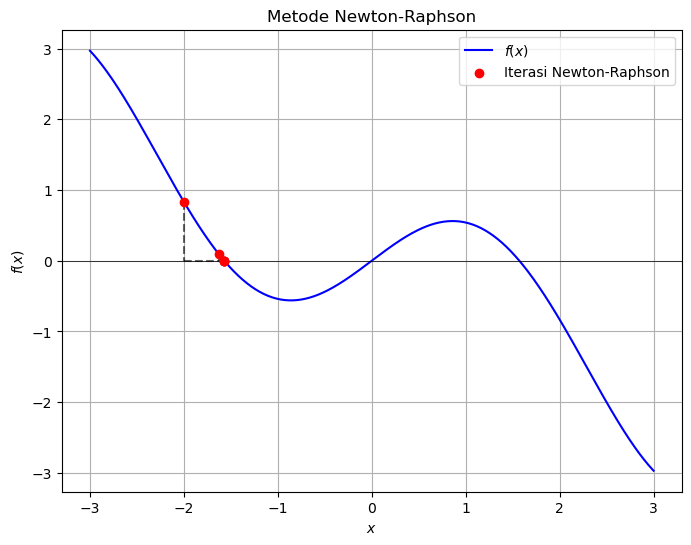

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Fungsi untuk Metode Newton-Raphson
def newton_raphson(f, df, x0, tol=1e-6, max_iter=100):
    iter_count = 0
    x_values = [x0]
    diff_values = []  # Untuk menyimpan selisih antara iterasi
    
    while iter_count < max_iter:
        fx = f(x0)
        dfx = df(x0)
        if dfx == 0:  # Hindari pembagian dengan nol
            print("Turunan nol, tidak bisa dilanjutkan.")
            break
        
        x_new = x0 - fx / dfx
        diff = abs(x_new - x0)
        x_values.append(x_new)
        diff_values.append(diff)
        
        if diff < tol:
            break
        
        x0 = x_new
        iter_count += 1
    
    return x_new, x_values, diff_values

# Fungsi untuk plotting hasil iterasi
def plot_newton_raphson(f, x_values, x_range):
    x = np.linspace(x_range[0], x_range[1], 400)
    y_f = f(x)
    
    plt.figure(figsize=(8, 6))
    plt.plot(x, y_f, label=r'$f(x)$', color='blue')
    plt.axhline(0, color='black',linewidth=0.5)
    plt.scatter(x_values, [f(x) for x in x_values], color='red', label='Iterasi Newton-Raphson', zorder=5)
    
    # Plot garis dari tiap iterasi
    for i in range(1, len(x_values)):
        plt.plot([x_values[i-1], x_values[i-1]], [f(x_values[i-1]), 0], 'k--', alpha=0.6)
        plt.plot([x_values[i-1], x_values[i]], [0, 0], 'k--', alpha=0.6)
    
    plt.xlabel(r'$x$')
    plt.ylabel(r'$f(x)$')
    plt.title('Metode Newton-Raphson')
    plt.legend()
    plt.grid(True)
    plt.show()

# Fungsi untuk menampilkan tabel hasil iterasi
def print_iteration_table(x_values, diff_values):
    iter_nums = np.arange(0, len(x_values))
    data = {
        'Iterasi': iter_nums,
        'x': x_values,
        'Selisih |x_new - x_old|': [0] + diff_values  # Selisih dimulai dari iterasi ke-1
    }
    df = pd.DataFrame(data)
    print(df)

# Persamaan f(x) dan turunan f'(x)
def f(x):
    return x * np.cos(x)  # Contoh persamaan f(x)

def df(x):
    return np.cos(x) - x * np.sin(x)      # Turunan dari f(x)

# Titik awal
x0 = 2

# Rentang untuk plotting
x_range = [-3, 3]

# Melakukan iterasi Newton-Raphson
x_root, x_values, diff_values = newton_raphson(f, df, x0)

# Menampilkan tabel iterasi
print_iteration_table(x_values, diff_values)

# Plotting hasil iterasi
plot_newton_raphson(f, x_values, x_range)


#

   Iterasi         x  Selisih |x_new - x_old|
0        0  3.000000             0.000000e+00
1        1 -4.015253             7.015253e+00
2        2 -4.852658             8.374050e-01
3        3 -4.711462             1.411958e-01
4        4 -4.712389             9.272395e-04
5        5 -4.712389             2.657385e-10


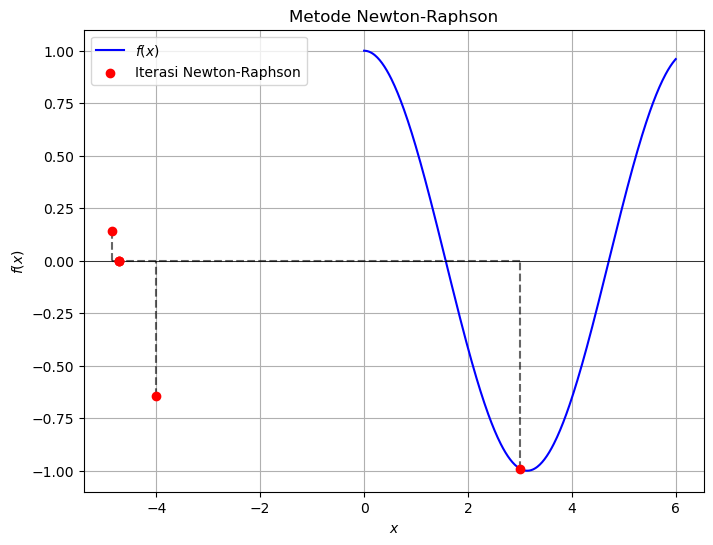

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Fungsi untuk Metode Newton-Raphson
def newton_raphson(f, df, x0, tol=1e-6, max_iter=100):
    # Definisi fungsi:
    # f: fungsi yang akar-akarnya ingin dicari
    # df: turunan dari fungsi f
    # x0: nilai awal untuk iterasi
    # tol: toleransi kesalahan, jika selisih antara iterasi kurang dari ini, iterasi berhenti
    # max_iter: jumlah maksimum iterasi yang diperbolehkan

    iterasi = 0  # Inisialisasi counter iterasi
    nilai_x = [x0]  # List untuk menyimpan nilai x dari setiap iterasi, dimulai dari nilai awal
    selisih = []  # List untuk menyimpan selisih antara nilai x saat ini dengan nilai x baru pada setiap iterasi

    while iterasi < max_iter:  # Looping iterasi sampai jumlah maksimum tercapai
        fx = f(x0)  # Hitung nilai fungsi f(x) pada titik x0
        dfx = df(x0)  # Hitung nilai turunan df(x) pada titik x0
        
        if dfx == 0:  # Jika turunan nol, berhenti karena pembagian dengan nol tidak dapat dilakukan
            print("Turunan nol, tidak bisa dilanjutkan.")
            break
        
        # Hitung nilai x baru dengan rumus Newton-Raphson: x_new = x0 - f(x0) / df(x0)
        x_baru = x0 - fx / dfx
        
        error = abs(x_baru - x0)  # Hitung selisih antara nilai x baru dan x lama
        nilai_x.append(x_baru)  # Simpan nilai x baru ke dalam list nilai_x
        selisih.append(error)  # Simpan selisih ke dalam list selisih
        
        if error < tol:  # Jika selisih kurang dari toleransi yang ditentukan, iterasi dihentikan
            break
        
        x0 = x_baru # Perbarui nilai x0 untuk iterasi berikutnya
        iterasi += 1  # Tingkatkan counter iterasi
    
    return x_baru, nilai_x, selisih  # Kembalikan hasil akhir x_baru, nilai-nilai x dari setiap iterasi, dan selisih


# Fungsi untuk plotting hasil iterasi
def plot_newton_raphson(f, x_nilai, x_range):
    # Definisi fungsi:
    # f: fungsi yang akar-akarnya ingin dicari (fungsi yang akan di-plot)
    # x_nilai: daftar nilai x dari hasil iterasi Newton-Raphson
    # x_range: rentang nilai x untuk membuat plot (misal, batas bawah dan atas dari sumbu x)
    
    x = np.linspace(x_range[0], x_range[1], 400)  # Membuat 400 titik x secara linier dari batas bawah ke atas
    y_f = f(x)  # Hitung nilai fungsi f(x) untuk setiap titik x
    
    plt.figure(figsize=(8, 6))  # Membuat kanvas plot dengan ukuran 8x6 inci
    plt.plot(x, y_f, label=r'$f(x)$', color='blue')  # Plot fungsi f(x) dengan garis biru
    plt.axhline(0, color='black', linewidth=0.5)  # Tambahkan garis horizontal di y=0 untuk menunjukkan sumbu x
    plt.scatter(x_nilai, [f(x) for x in x_nilai], color='red', label='Iterasi Newton-Raphson', zorder=5)
    # Plot titik-titik hasil iterasi Newton-Raphson sebagai scatter plot merah, dengan x_nilai sebagai x dan f(x_nilai) sebagai y
    
    # Plot garis vertikal dan horizontal yang menghubungkan nilai iterasi
    for i in range(1, len(x_nilai)):  # Iterasi dari titik kedua hingga terakhir
        plt.plot([x_nilai[i-1], x_nilai[i-1]], [f(x_nilai[i-1]), 0], 'k--', alpha=0.6)
        # Plot garis vertikal dari (x_nilai[i-1], f(x_nilai[i-1])) ke (x_nilai[i-1], 0) (ke sumbu x)
        plt.plot([x_nilai[i-1], x_nilai[i]], [0, 0], 'k--', alpha=0.6)
        # Plot garis horizontal dari (x_nilai[i-1], 0) ke (x_nilai[i], 0) (di sepanjang sumbu x)
    
    plt.xlabel(r'$x$')  # Label sumbu x
    plt.ylabel(r'$f(x)$')  # Label sumbu y
    plt.title('Metode Newton-Raphson')  # Judul plot
    plt.legend()  # Menampilkan legenda
    plt.grid(True)  # Mengaktifkan grid pada plot
    plt.show()  # Menampilkan plot


# Fungsi untuk menampilkan tabel hasil iterasi
def print_iteration_table(x_nilai, selisih):
    # Fungsi untuk menampilkan tabel hasil iterasi
    # x_nilai: daftar nilai x dari setiap iterasi
    # selisih: daftar selisih antara x_new dan x_old untuk setiap iterasi (dimulai dari iterasi ke-1)
    
    iterasi = np.arange(0, len(x_nilai))  # Membuat array nomor iterasi mulai dari 0 hingga jumlah elemen x_nilai
    
    # Membuat dictionary yang akan digunakan untuk membentuk DataFrame
    data = {
        'Iterasi': iterasi,  # Kolom untuk nomor iterasi
        'x': x_nilai,  # Kolom untuk nilai x pada setiap iterasi
        'Selisih |x_new - x_old|': [0] + selisih  # Kolom untuk selisih antara x baru dan x lama, dimulai dengan 0 untuk iterasi pertama
    }
    
    df = pd.DataFrame(data)  # Membuat DataFrame dari dictionary data
    print(df)  # Menampilkan DataFrame sebagai tabel hasil iterasi


# Persamaan f(x) dan turunan f'(x)
def f(x):
    return np.cos(x)  # Contoh persamaan f(x)A

def df(x):
    return -np.sin(x)      # Turunan dari f(x)

# Titik awal
x0 = 3

# Rentang untuk plotting
x_range = [0, 6]

# Melakukan iterasi Newton-Raphson
x_root, x_values, diff_values = newton_raphson(f, df, x0)

# Menampilkan tabel iterasi
print_iteration_table(x_values, diff_values)

# Plotting hasil iterasi
plot_newton_raphson(f, x_values, x_range)


   Iterasi         x  Selisih |x_new - x_old|
0        0  5.000000             0.000000e+00
1        1  4.704187             2.958129e-01
2        2  4.712389             8.202080e-03
3        3  4.712389             1.839218e-07


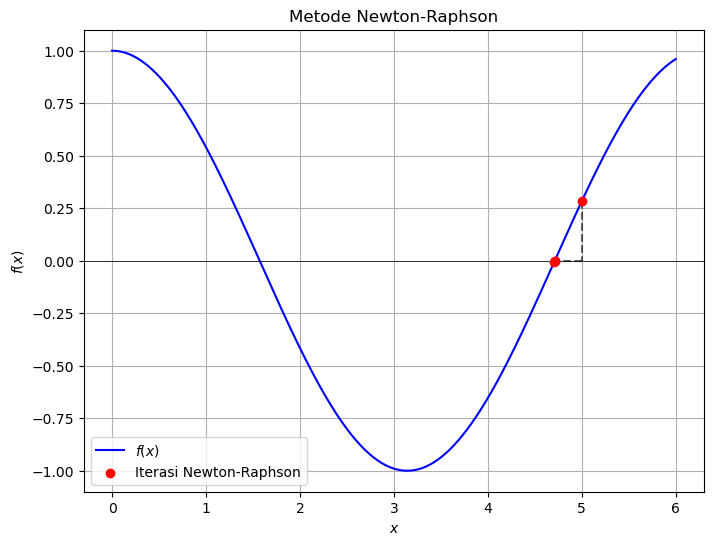

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Fungsi untuk Metode Newton-Raphson
def newton_raphson(f, df, x0, tol=1e-6, max_iter=100):
    # Definisi fungsi:
    # f: fungsi yang akar-akarnya ingin dicari
    # df: turunan dari fungsi f
    # x0: nilai awal untuk iterasi
    # tol: toleransi kesalahan, jika selisih antara iterasi kurang dari ini, iterasi berhenti
    # max_iter: jumlah maksimum iterasi yang diperbolehkan

    iterasi = 0  # Inisialisasi counter iterasi
    nilai_x = [x0]  # List untuk menyimpan nilai x dari setiap iterasi, dimulai dari nilai awal
    selisih = []  # List untuk menyimpan selisih antara nilai x saat ini dengan nilai x baru pada setiap iterasi

    while iterasi < max_iter:  # Looping iterasi sampai jumlah maksimum tercapai
        fx = f(x0)  # Hitung nilai fungsi f(x) pada titik x0
        dfx = df(x0)  # Hitung nilai turunan df(x) pada titik x0
        
        if dfx == 0:  # Jika turunan nol, berhenti karena pembagian dengan nol tidak dapat dilakukan
            print("Turunan nol, tidak bisa dilanjutkan.")
            break
        
        # Hitung nilai x baru dengan rumus Newton-Raphson: x_new = x0 - f(x0) / df(x0)
        x_baru = x0 - fx / dfx
        
        error = abs(x_baru - x0)  # Hitung selisih antara nilai x baru dan x lama
        nilai_x.append(x_baru)  # Simpan nilai x baru ke dalam list x_values
        selisih.append(error)  # Simpan selisih ke dalam list selisih
        
        if error < tol:  # Jika selisih kurang dari toleransi yang ditentukan, iterasi dihentikan
            break
        
        x0 = x_baru # Perbarui nilai x0 untuk iterasi berikutnya
        iterasi += 1  # Tingkatkan counter iterasi
    
    return x_baru, nilai_x, selisih  # Kembalikan hasil akhir x_new, nilai-nilai x dari setiap iterasi, dan selisih


# Fungsi untuk plotting hasil iterasi
def plot_newton_raphson(f, x_nilai, x_range):
    # Definisi fungsi:
    # f: fungsi yang akar-akarnya ingin dicari (fungsi yang akan di-plot)
    # x_nilai: daftar nilai x dari hasil iterasi Newton-Raphson
    # x_range: rentang nilai x untuk membuat plot (misal, batas bawah dan atas dari sumbu x)
    
    x = np.linspace(x_range[0], x_range[1], 400)  # Membuat 400 titik x secara linier dari batas bawah ke atas
    y_f = f(x)  # Hitung nilai fungsi f(x) untuk setiap titik x
    
    plt.figure(figsize=(8, 6))  # Membuat kanvas plot dengan ukuran 8x6 inci
    plt.plot(x, y_f, label=r'$f(x)$', color='blue')  # Plot fungsi f(x) dengan garis biru
    plt.axhline(0, color='black', linewidth=0.5)  # Tambahkan garis horizontal di y=0 untuk menunjukkan sumbu x
    plt.scatter(x_nilai, [f(x) for x in x_nilai], color='red', label='Iterasi Newton-Raphson', zorder=5)
    # Plot titik-titik hasil iterasi Newton-Raphson sebagai scatter plot merah, dengan x_nilai sebagai x dan f(x_nilai) sebagai y
    
    # Plot garis vertikal dan horizontal yang menghubungkan nilai iterasi
    for i in range(1, len(x_nilai)):  # Iterasi dari titik kedua hingga terakhir
        plt.plot([x_nilai[i-1], x_nilai[i-1]], [f(x_nilai[i-1]), 0], 'k--', alpha=0.6)
        # Plot garis vertikal dari (x_nilai[i-1], f(x_nilai[i-1])) ke (x_nilai[i-1], 0) (ke sumbu x)
        plt.plot([x_nilai[i-1], x_nilai[i]], [0, 0], 'k--', alpha=0.6)
        # Plot garis horizontal dari (x_nilai[i-1], 0) ke (x_nilai[i], 0) (di sepanjang sumbu x)
    
    plt.xlabel(r'$x$')  # Label sumbu x
    plt.ylabel(r'$f(x)$')  # Label sumbu y
    plt.title('Metode Newton-Raphson')  # Judul plot
    plt.legend()  # Menampilkan legenda
    plt.grid(True)  # Mengaktifkan grid pada plot
    plt.show()  # Menampilkan plot


# Fungsi untuk menampilkan tabel hasil iterasi
def print_iteration_table(x_nilai, selisih):
    # Fungsi untuk menampilkan tabel hasil iterasi
    # x_nilai: daftar nilai x dari setiap iterasi
    # selisih: daftar selisih antara x_new dan x_old untuk setiap iterasi (dimulai dari iterasi ke-1)
    
    iterasi = np.arange(0, len(x_nilai))  # Membuat array nomor iterasi mulai dari 0 hingga jumlah elemen x_nilai
    
    # Membuat dictionary yang akan digunakan untuk membentuk DataFrame
    data = {
        'Iterasi': iterasi,  # Kolom untuk nomor iterasi
        'x': x_nilai,  # Kolom untuk nilai x pada setiap iterasi
        'Selisih |x_new - x_old|': [0] + selisih  # Kolom untuk selisih antara x baru dan x lama, dimulai dengan 0 untuk iterasi pertama
    }
    
    df = pd.DataFrame(data)  # Membuat DataFrame dari dictionary data
    print(df)  # Menampilkan DataFrame sebagai tabel hasil iterasi


# Persamaan f(x) dan turunan f'(x)
def f(x):
    return np.cos(x)  # Contoh persamaan f(x)A

def df(x):
    return -np.sin(x)      # Turunan dari f(x)

# Titik awal
x0 = 5

# Rentang untuk plotting
x_range = [0, 6]

# Melakukan iterasi Newton-Raphson
x_root, x_values, diff_values = newton_raphson(f, df, x0)

# Menampilkan tabel iterasi
print_iteration_table(x_values, diff_values)

# Plotting hasil iterasi
plot_newton_raphson(f, x_values, x_range)
